# OilyGiant mining company Well Selection

OilyGiant has tasked us with finding the safest and most profitable region to add new wells. We will train 3 models to see which region has the highest profit, best reserves and lowest risk of loss. Given that OilyGiant will build 200 wells, we will be sure the take the top producing wells in our final analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df_0 = pd.read_csv('C:/Users/cmram/Downloads/geo_data_0.csv')
df_1 = pd.read_csv('C:/Users/cmram/Downloads/geo_data_1.csv')
df_2 = pd.read_csv('C:/Users/cmram/Downloads/geo_data_2.csv')

In [3]:
display(df_0.head())
display(df_1.head())
display(df_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Checking for duplicate rows

In [4]:
num_duplicated_rows_0 = df_0['id'].duplicated().sum()
num_duplicated_rows_1 = df_1['id'].duplicated().sum()
num_duplicated_rows_2 = df_2['id'].duplicated().sum()


print(f"Number of duplicated rows in df_0: {num_duplicated_rows_0}")
print(f"Number of duplicated rows in df_1: {num_duplicated_rows_1}")
print(f"Number of duplicated rows in df_2: {num_duplicated_rows_2}")

Number of duplicated rows in df_0: 10
Number of duplicated rows in df_1: 4
Number of duplicated rows in df_2: 4


In [5]:
avg0 = df_0['product'].mean()
avg1 = df_1['product'].mean()
avg2 = df_2['product'].mean()

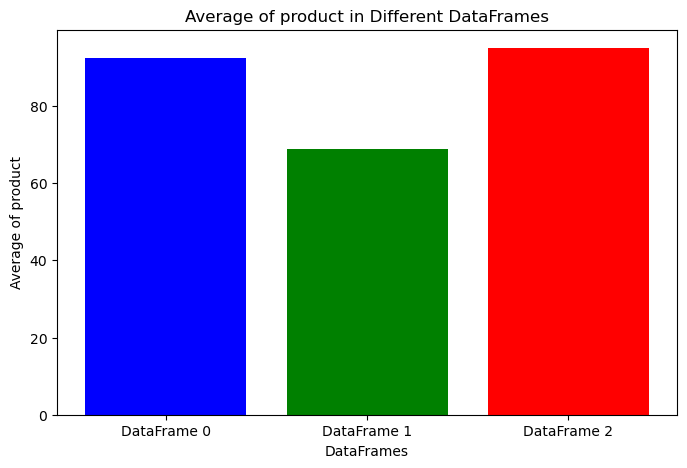

In [6]:
averages = [avg0, avg1, avg2]
labels = ['DataFrame 0', 'DataFrame 1', 'DataFrame 2']

plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=['blue', 'green', 'red'])
plt.xlabel('DataFrames')
plt.ylabel('Average of product')
plt.title('Average of product in Different DataFrames')
plt.show()

Region 2 has the highest average "product" per well of the 3 regions

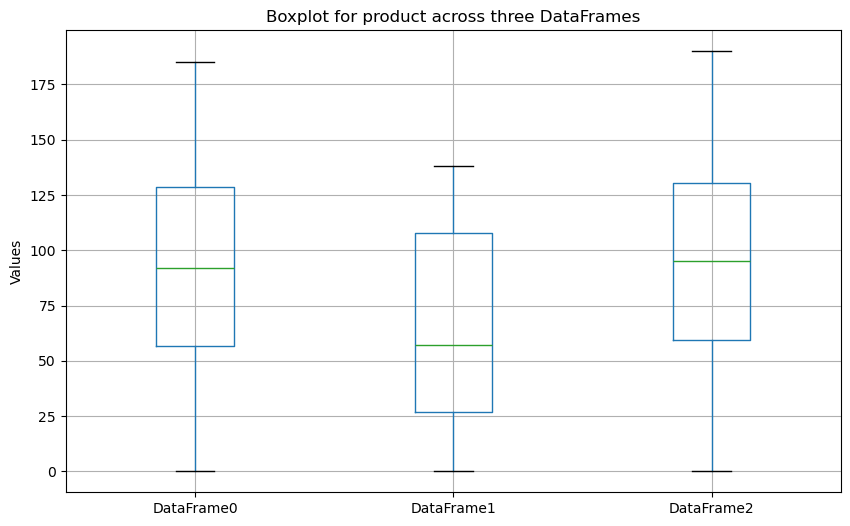

In [7]:
combined_df = pd.DataFrame({
    'DataFrame0': df_0['product'],
    'DataFrame1': df_1['product'],
    'DataFrame2': df_2['product']
})

plt.figure(figsize=(10, 6))
combined_df.boxplot()
plt.title('Boxplot for product across three DataFrames')
plt.ylabel('Values')
plt.show()

Region 0 and 2 have very similar box and wisker plots with region 1 being very underwhelming

In [8]:
correlation_matrix_0 = df_0.select_dtypes(include='number').corr()
correlation_matrix_1 = df_1.select_dtypes(include='number').corr()
correlation_matrix_2 = df_2.select_dtypes(include='number').corr()

print(correlation_matrix_0)
print(correlation_matrix_1)
print(correlation_matrix_2)


               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


I believe that because we were not giving the information on what f0, f1, and f2 are. We can see if they have a positive or negative correlation but we don't understand what is being compared.

# Training and testing my models

In [9]:
features_0 = df_0.drop(['id', 'product'], axis=1)
features_1 = df_1.drop(['id', 'product'], axis=1)
features_2 = df_2.drop(['id', 'product'], axis=1)

target_0 = df_0['product']
target_1 = df_1['product']
target_2 = df_2['product']
seed = 12345

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size = 0.25, random_state = seed)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size = 0.25, random_state = seed)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size = 0.25, random_state = seed)

print(features_train_0.shape)
print(features_valid_0.shape)

(75000, 3)
(25000, 3)


In [10]:
model_0 = LinearRegression().fit(features_train_0, target_train_0)
model_1 = LinearRegression().fit(features_train_1, target_train_1)
model_2 = LinearRegression().fit(features_train_2, target_train_2)

prediction_valid_0 = model_0.predict(features_valid_0)
prediction_valid_1 = model_1.predict(features_valid_1)
prediction_valid_2 = model_2.predict(features_valid_2)

predictions = [prediction_valid_0, prediction_valid_1, prediction_valid_2]
actuals = [target_valid_0.values, target_valid_1.values, target_valid_2.values]

In [11]:
r2_0 = r2_score(target_valid_0, prediction_valid_0)
rmse_0 = mean_squared_error(target_valid_0, prediction_valid_0) ** 0.5 
average_volume_0 = prediction_valid_0.mean()

r2_1 = r2_score(target_valid_1, prediction_valid_1)
rmse_1 = mean_squared_error(target_valid_1, prediction_valid_1) ** 0.5
average_volume_1 = prediction_valid_1.mean()

r2_2 = r2_score(target_valid_2, prediction_valid_2)
rmse_2 = mean_squared_error(target_valid_2, prediction_valid_2) ** 0.5
average_volume_2 = prediction_valid_2.mean()

print("Region 0:", 'r2 =', r2_0, 'RMSE =', rmse_0, 'Average Reserves = ', average_volume_0)
print("Region 1:", 'r2 =', r2_1, 'RMSE =', rmse_1, 'Average Reserves = ', average_volume_1)
print("Region 2:", 'r2 =', r2_2, 'RMSE =', rmse_2, 'Average Reserves = ', average_volume_2)

Region 0: r2 = 0.27994321524487786 RMSE = 37.5794217150813 Average Reserves =  92.59256778438035
Region 1: r2 = 0.9996233978805127 RMSE = 0.8930992867756167 Average Reserves =  68.728546895446
Region 2: r2 = 0.20524758386040443 RMSE = 40.02970873393434 Average Reserves =  94.96504596800489


Region 1 has an extremely high r2 and RMSE score meaning the predictions from this model are very accurate. Region 0 has a higher r2 and lover RMSE than region 2 so it is hard to tell which of those models are more predictable.

# Preparing Profit Calculation

In [12]:
total_wells = 200
budget = 100000000
revenue_per_barrel = 4.5

cost_per_well = budget / total_wells
volume_needed = cost_per_well / (revenue_per_barrel * 1000)

print(f"Volume Needed for Profitability: {volume_needed}")

Volume Needed for Profitability: 111.11111111111111


Above we see that we need 111 units to be profitable. Model 2 has a very low RMSE meaning our predictions are very close to the actual, but we see the average volume on that model is only 69 units so most likely that model will not be our most profitable. The other 2 model have a higher RMSE but also an average volume closer to the needed amount.

In [13]:
def break_even_analysis(actuals, budget, revenue_per_barrel):

    for i, actual in enumerate(actuals):
        avg_volume = np.mean(actual)
        print(f"Region {i}:")
        print(f"Break-even Volume: {volume_needed} thousand barrels")
        print(f"Actual Average Volume: {avg_volume} thousand barrels")

        if avg_volume > volume_needed:
            print(f"The actual average volume in Region {i} is sufficient for break-even.\n")
        else:
            print(f"The actual average volume in Region {i} is not sufficient for break-even.\n")

break_even_analysis(actuals, budget, revenue_per_barrel)

Region 0:
Break-even Volume: 111.11111111111111 thousand barrels
Actual Average Volume: 92.07859674082927 thousand barrels
The actual average volume in Region 0 is not sufficient for break-even.

Region 1:
Break-even Volume: 111.11111111111111 thousand barrels
Actual Average Volume: 68.72313602435997 thousand barrels
The actual average volume in Region 1 is not sufficient for break-even.

Region 2:
Break-even Volume: 111.11111111111111 thousand barrels
Actual Average Volume: 94.88423280885438 thousand barrels
The actual average volume in Region 2 is not sufficient for break-even.



This shows that if wells are selected at random it is very unlikely for any of the regions to be profitable.

# Calculating Profit 

In [14]:
def calculate_profit(predictions, actual, budget, revenue_per_barrel, top_n=200):
    # Sort predictions and get indices of the top wells
    indices = np.argsort(predictions)[-top_n:]
    
    # Sum the reserves for the top wells
    selected_reserves = actual[indices].sum()
    
    # Calculate revenue and profit
    revenue = selected_reserves * revenue_per_barrel * 1000
    profit = revenue - budget
    
    return profit, selected_reserves

In [15]:
def evaluate_regions(predictions_list, actuals_list, budget, revenue_per_barrel):
    best_region = None
    highest_profit = float('-inf')

    for i, (predictions, actual) in enumerate(zip(predictions_list, actuals_list)):
        profit, reserves = calculate_profit(predictions, actual, budget, revenue_per_barrel)
        print(f"Region {i}: Profit: ${profit}")
        print(f"Region {i}: Total Reserves: {reserves} thousand barrels")
        
        if profit > highest_profit:
            highest_profit = profit
            best_region = i

    print(f"\nSuggested Region for Development: Region {best_region}, with an expected profit of ${highest_profit}")

evaluate_regions(predictions, actuals, budget, revenue_per_barrel)

Region 0: Profit: $33208260.431398526
Region 0: Total Reserves: 29601.83565142189 thousand barrels
Region 1: Profit: $24150866.966815114
Region 1: Total Reserves: 27589.081548181137 thousand barrels
Region 2: Profit: $27103499.635998324
Region 2: Total Reserves: 28245.22214133296 thousand barrels

Suggested Region for Development: Region 0, with an expected profit of $33208260.431398526


Region 0 is the most profitable at 33.6 million and also has the highest total reserves of the 3 regions. Combining profitability with acceptable accuracy makes Region 0 the best choice for development.

# Risk and Profit

In [16]:
def bootstrap_profit(predictions, actual, budget, revenue_per_barrel, n_samples=1000, top_n=200):
    profits = []

    np.random.seed(42)

    for _ in range(n_samples):
        sample_indices = np.random.choice(len(predictions), 500, replace=True)
        sample_predictions = predictions[sample_indices]
        sample_actual = actual[sample_indices]

        profit, _ = calculate_profit(sample_predictions, sample_actual, budget, revenue_per_barrel, top_n)
        profits.append(profit)

    return np.array(profits)

def analyze_bootstrap(profits):
    
    avg_profit = np.mean(profits)

    confidence_interval = np.percentile(profits, [2.5, 97.5])

    risk_of_loss = np.mean(profits < 0) * 100

    return avg_profit, confidence_interval, risk_of_loss

for i, (predictions, actual) in enumerate(zip(predictions, actuals)):
    profits = bootstrap_profit(predictions, actual, budget, revenue_per_barrel)
    avg_profit, confidence_interval, risk_of_loss = analyze_bootstrap(profits)

    print(f"Region {i}:")
    print(f"Average Profit: ${avg_profit}")
    print(f"95% Confidence Interval: {confidence_interval}")
    print(f"Risk of Loss: {risk_of_loss}%\n")

Region 0:
Average Profit: $3816285.4216458495
95% Confidence Interval: [-974513.11622914 8785099.43314428]
Risk of Loss: 7.3%

Region 1:
Average Profit: $4517872.162083975
95% Confidence Interval: [ 674783.94112124 8493847.21657942]
Risk of Loss: 0.7000000000000001%

Region 2:
Average Profit: $3903056.2956554582
95% Confidence Interval: [-1287998.72170396  9178274.32096762]
Risk of Loss: 7.7%



# Final Thoughts

We have looked at all three regions and region 1 has the highest average profit and confidence interval. All 3 regions have the possibility of being profitable but region 2 have the lowest risk of loss. When we tested our break even analysis, we would have assumed none of the regions would be profitable but that is why we tested bootstrap analysis with only the top 200 wells. Region 0 had the highest Total Reserves equaling 29601.8 but that doesn't mean the top 200 would guarantee a profitable region. Region 1 has the only 95% confidence interval that is always profitable. All of the results lead to Region 1 being our recommendation to OilyGiant for well production.